<a href="https://colab.research.google.com/github/RodrigoMarenda/Sports_Predictions/blob/main/notebooks/Sports_Predctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Previsões de Partidas de Futebol Baseadas em Resultados Históricos</p>


![**Previsões de Partidas de Futebol Baseadas em Resultados Históricos**](https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/Crystal_Ball.jpeg?raw=true)

# **Introdução**

### **Definição do Problema:**

"Nos últimos anos, o setor de apostas esportivas tem apresentado um crescimento, impulsionado pelo interesse das pessoas das pessoas em fazer apostas nas "Bets". Neste contexto, a aplicação de machine learning surge como uma ferramenta de apoio para fornecer análises preditivas com base dados históricos.

O Objetivo desse modelo é trabalhar dados complexos para que sejam traduzidos em previsões probabilísticas de fácil compreensão, que possam ajudar o apostador a identificar tendências e reduzir a incerteza na tomada de decisão.

O modelo vai gerar previsões precisas sobre possíveis desfechos dos jogos (como vitória, derrota, empate) ou até mesmo estimar placares específicos.

Ao integrar esse tipo de tecnologia, as plataformas de apostas podem não apenas oferecer um diferencial competitivo aos usuários, mas também melhorar a experiência dos apostadores ao permitir que tomem decisões baseadas em informações mais confiáveis e personalizadas. A inovação agrega valor à experiência de aposta ao transformar dados em insights estratégicos, contribuindo para um ambiente de aposta mais seguro e analítico."



*******************************************

**Descrição do Problema 01 :**

1. Previsão do Resultado do Jogo (Classificação)

•	Problema: Prever o vencedor de uma partida (se o time mandante , time visitante vai ganhar ou se é empate). Vamos aplicar um modelo de classificação, onde a variável
alvo seria o resultado do jogo (mandante visitante ou impate).

**Tipo de Problema**
Tipo de Problema: **classificação supervisionada**  (Mandante vence , Visitante vence ou empate).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar uma tendencia de resultado.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.

  - **Variáveis**:

Features (entradas):
Colocação dos times (colocacao_mandante, colocacao_visitante).
Valor das equipes titulares (valor_equipe_titular_mandante, valor_equipe_titular_visitante).
Idade média dos titulares (idade_media_titular_mandante, idade_media_titular_visitante).
Outros fatores como público, estádio, e técnicos.

Target (saída): Vencedor (Mandante,  Visitante ou empate).


*******************************************

**Descrição do Problema 02 :**

2. Previsão do Número de Gols (Regressão)

•	Problema: Prever o número de gols de cada time (mandante ou visitante) durante a partida.

**Tipo de Problema**
•	Tipo de Problema: Regressão, pois estamos prevendo uma quantidade contínua (número de gols).


  - **Premissa**: Dados históricos dos jogos disputados, com variaveis que possam ser correlacionadas para determinar a quantidade de gols para cada time.

  - **Hipótese**: Um modelo de machine learning treinado com dados históricos, para identificar padrões que ajudem a prever o resultado das partidas.

  - **Variáveis**:

Features (entradas):
	Variáveis relacionadas ao time, como o valor da equipe titular, a colocação no campeonato, idade média dos titulares, técnico, etc.

Target (saída): Gols do mandante ou gols do visitante (dependendo de qual você quer prever).


******************************************

## **Estrutura do projeto:**

[**1. Importação das Bibliotecas:**](#1)

[**2. Carga dos Dados:**](#2)

[**3. Pré-processamento de dados:**](#3)

[**4. Análise da Distribuição dos Dados:**](#4)

[**Problema 01: Modelo Classificação**]

 - [**5.1 Escolha do algoritmo:**](#5)

 - [**6.1 Otimização do modelo:**](#6)

 - [**7.1 Valiação dos resultados:**](#7)

[**Problema 02: Modelo de Regressão**]

 - [**5.2. Escolha do algoritmo:**](#5)

 - [**6.2. Otimização do modelo:**](#6)

 - [**7.2. Valiação dos resultados:**](#7)


[**8. Conclusão:**](#8)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>

Nessa etapa estamos importanto todas as blibliotecas que serão utilizadas nesse algoritimo

#Step 01: Importação da Bibliotecas

In [302]:
# Imports das Bibliotecas necessárias

import pandas as pd             #Biblioteca para manipulação e análise de dados.
import matplotlib.pyplot as plt #Biblioteca de histogramas e gráficos
import seaborn as sns           #Biblioteca de gráficos
import warnings                 #Biblioteca de avisos
import numpy as np              #Biblioteca de operações numéricas
import os                       #Biblioteca para interagir com o sistema operacional
import random                   #Biblioteca para gerar números aleatórios



# Configuração para não exibir os warnings
warnings.filterwarnings("ignore")


#Step 02: Importação das Bibliotecas de Machine Learning

In [303]:

from sklearn.model_selection import train_test_split          # para particionar em bases de treino e teste (holdout)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # modelo de classificação por floresta aleatória e boosting gradiente
from sklearn.svm import SVC                                   # máquina de vetor de suporte para classificação
from sklearn.preprocessing import StandardScaler              # Normaliza as variáveis numéricas
from sklearn.neighbors import KNeighborsClassifier            # K-Nearest Neighbors (KNN) para classificação
from sklearn.naive_bayes import GaussianNB                    # Naive Bayes Gaussiano para classificação
from sklearn.metrics import confusion_matrix                  # Gera uma matriz de confusão
from sklearn.metrics import classification_report             # relatório de métricas de desempenho de um modelo
from sklearn.model_selection import KFold                     # para preparar os folds da validação cruzada
from sklearn.preprocessing import LabelEncoder                # Converte valores categóricos
from sklearn.exceptions import UndefinedMetricWarning         # identificar problemas em métricas
from sklearn.model_selection import GridSearchCV , cross_val_score             # validação cruzada.
from sklearn.model_selection import RandomizedSearchCV        # Modelo Randomico com busca em hiperparametros.
from sklearn.preprocessing import Normalizer                  # Normaliza uma base de dados
from sklearn.tree import DecisionTreeClassifier               # Modelo de árvore de decisão para classificação
from sklearn.ensemble import RandomForestClassifier           # Floresta aleatória de árvores de decisão
from sklearn.linear_model import LogisticRegression           # Regressão logística
from sklearn.metrics import accuracy_score, classification_report  # Calcula a acurácia do modelo
from sklearn.metrics import make_scorer, classification_report, f1_score
from joblib import dump                                       # Para salvar o objeto em um arquivo
from xgboost import XGBClassifier                             # Modelo para classificação e regressão
from imblearn.pipeline import Pipeline                        #Classe para dados desbalanceados.
from imblearn.over_sampling import SMOTE                      #Lib para problemas de desbalanceamento de classes
import joblib                                                 # Lib para salvar modelos treinados


# imports das Bibliotecas para plotar Matriz de Confusão
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carga dos Dados</p>

Nessa etapa estamos realizando a carga dos dados, que estão armazendos em um arquivo do tipo csv (Comma-Separated Values). Esse dataset foi obtido no Site Base de Dados.Org. Foram coletados dados das partidas de futebol realizadas desde 2013 até o ano de 2024, com o objetivo de realizar a predição de resultados de jogos de futebol.



#Step 01: Carga dos Dados

In [304]:
#--------------------------------------------------------#
# Informa a URL de importação do dataset                 #
#--------------------------------------------------------#

url = "https://raw.githubusercontent.com/RodrigoMarenda/Sports_Predictions/refs/heads/main/data/Dados_Brasileirao_org_dez.csv"

# Lê o arquivo
df = pd.read_csv(url, delimiter=';')

# Exibir as primeiras linhas do DataFrame
df.head()



,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2007,03/05/2007,1,Estádio João Cláudio de Vasconcelos Machado,Washington José Alves de Souza,26469.0,NaN,América-RN,Vasco da Gama,NaN,...,0,1,10,10,0,1,10,10,12,13
1,2007,20/05/2007,2,Estádio Governador Magalhães Pinto,Luís Antônio Silva Santos,17702.0,NaN,Cruzeiro,Corinthians,NaN,...,0,1,10,10,0,1,10,10,12,13
2,2007,27/05/2007,3,Arena da Baixada,Wagner Tardelli Azevedo,13311.0,NaN,Atlético-PR,Santos FC,NaN,...,0,1,10,10,0,1,10,10,12,13
3,2007,27/05/2007,3,Estádio Cícero Pompeu de Toledo,Elvecio Zequetto,21580.0,NaN,Corinthians,Atlético-MG,NaN,...,0,1,10,10,0,1,10,10,12,13
4,2007,27/05/2007,3,Estádio João Cláudio de Vasconcelos Machado,Cláudio Luciano Mercante Júnior,11107.0,NaN,América-RN,Figueirense FC,NaN,...,0,1,10,10,0,1,10,10,12,13


In [228]:
# Verifica o tamanho do dataset , total de linhas e colunas.
df.shape
print(f"O Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

O Dataset tem 6692 linhas e 39 colunas.


In [252]:
# Verifica a estrutura do dataset, datatypes das colunas
df.dtypes

,0
ano_campeonato,int64
data,object
rodada,int64
estadio,object
arbitro,object
publico,float64
publico_max,float64
time_mandante,object
time_visitante,object
tecnico_mandante,object


Os tipos de dados estão corretos, mas temos muitas colunas que não fazem sentindo para a analise. Na proxima etapa vamos ajustar o dataset somente com as colunas que fazem sentido para a analise e fazer as tratativas de ETL dos dados.

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Pré-processamento de dados:</p>


Nessa etapa será realizado o ajuste do dataset, para considerar somente as colunas que fazem sentido para a analise. Também será feita a limpeza, transformação e
o tratamento de dados nulos ou vazios. Faremos a padronização dos dados para melhorar o desempenho do algoritmo.

# Step 01: Identificando as Colunas mais Importantes

In [305]:
#coletando as colunas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns


# Aplicando Label Encoding para cada coluna categórica
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Salva o encoder para futuras referências

# Divisão do dataset entre features (X) e target (y)
# Substitua 'resultado' pela coluna de alvo (target) do seu dataset
X = df.drop(columns=['Resultado_Jogo'])  # Exclui a coluna 'resultado' (alvo)
y = df['Resultado_Jogo']  # Define a variável alvo

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento do modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Obtenção das importâncias das variáveis
importances = rf_model.feature_importances_
features = X_train.columns

# Criando um DataFrame para organizar as importâncias
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrando a tabela de importâncias
print(feature_importance_df)

                           Feature    Importance
16   idade_media_titular_visitante  1.774511e-01
23                      Artilheiro  1.592790e-01
15    idade_media_titular_mandante  1.153708e-01
14  valor_equipe_titular_visitante  1.087469e-01
13   valor_equipe_titular_mandante  9.528404e-02
10               tecnico_visitante  5.509662e-02
9                 tecnico_mandante  4.241013e-02
36            chutes_fora_mandante  3.301731e-02
26                 faltas_mandante  3.130687e-02
25            escanteios_visitante  2.954802e-02
33          impedimentos_visitante  2.502522e-02
30                defesas_mandante  2.133260e-02
34                 chutes_mandante  2.064937e-02
17                   gols_mandante  1.515876e-02
24             escanteios_mandante  1.510377e-02
29    chutes_bola_parada_visitante  1.402896e-02
32           impedimentos_mandante  8.343574e-03
37           chutes_fora_visitante  8.009435e-03
35                chutes_visitante  7.706834e-03
28     chutes_bola_p

# Step 02: Removendo as Colunas Desnecessárias

In [306]:
# Preparação dos dados


# Removendo algumas colunas do DataFrame
colunas_para_remover = ['arbitro', 'gols_1_tempo_mandante','gols_1_tempo_visitante','escanteios_mandante','escanteios_visitante','faltas_mandante',
'faltas_visitante','chutes_bola_parada_mandante','chutes_bola_parada_visitante','defesas_mandante','defesas_visitante','impedimentos_mandante','impedimentos_visitante','chutes_mandante','chutes_visitante','chutes_fora_mandante','chutes_fora_visitante',
'Resultado_Jogo']



# Remove as colunas informadas
df_selecionado = df.drop(columns=colunas_para_remover)



# Exibindo as primeiras linhas do DataFrame com as colunas removidas
print(df_selecionado.isnull().sum())

print("\n")
print(f"O Dataset de 39 Colunas ficou com {df_selecionado.shape[1]} colunas.")







ano_campeonato                       0
data                                 0
rodada                               0
estadio                              0
publico                              1
publico_max                       2561
time_mandante                        0
time_visitante                       0
tecnico_mandante                     0
tecnico_visitante                    0
colocacao_mandante                   0
colocacao_visitante                  0
valor_equipe_titular_mandante      386
valor_equipe_titular_visitante     386
idade_media_titular_mandante       388
idade_media_titular_visitante      388
gols_mandante                        2
gols_visitante                       2
media_gol_mandante                   0
media_gol_visitante                  0
Artilheiro                           0
dtype: int64


O Dataset de 39 Colunas ficou com 21 colunas.


# Step 03: Identificação das Colunas Vazias ou Nulas

In [307]:
# Verificando se existem valores ausentes no dataset

null_counts = df_selecionado.isnull().sum()

# Loop para verificar as colunas com valores nulos
for column, value in null_counts.items():
    if value != 0:
        print(f"Coluna '{column}' tem {value} valores nulos")



Coluna 'publico' tem 1 valores nulos
Coluna 'publico_max' tem 2561 valores nulos
Coluna 'valor_equipe_titular_mandante' tem 386 valores nulos
Coluna 'valor_equipe_titular_visitante' tem 386 valores nulos
Coluna 'idade_media_titular_mandante' tem 388 valores nulos
Coluna 'idade_media_titular_visitante' tem 388 valores nulos
Coluna 'gols_mandante' tem 2 valores nulos
Coluna 'gols_visitante' tem 2 valores nulos


# Step 04: Tratativa das Colunas Vazias ou Nulas

Para tratar os Valores nulos, foram adotadas algumas regras de acordo com cada tipo de dado, de forma que essas atribuições de valores não gerem impacto de tendencia para a analise.  





In [308]:


# Tratativa para Valores ausentes
# Loop para verificar e substituir valores nulos em cada coluna
for index, row in df_selecionado.iterrows():

    # estadio                             11
    if pd.isnull(row['estadio']):  # Verificando se o valor da coluna 'estadio' é nulo
        df_selecionado.at[index, 'estadio'] = 'Desconhecido'  # Substituindo por um valor


    #publico                           1711
    if pd.isnull(row['publico']):  # Verificando se o valor da coluna 'publico' é nulo
        df_selecionado.at[index, 'publico'] = 1000  # Substituindo por valor publico minimo


    #publico_max                       4271
    if pd.isnull(row['publico_max']):  # Verificando se o valor da coluna 'publico_max' é nulo
        df_selecionado.at[index, 'publico_max'] = 1000  # Substituindo por valor publico max

    #tecnico_mandante                       2154
    if pd.isnull(row['tecnico_mandante']):  # Verificando se o valor da coluna 'tecnico_mandante' é nulo
        df_selecionado.at[index, 'tecnico_mandante']  = 'Desconhecido'  # Substituindo por valor

    #tecnico_visitante                       2154
    if pd.isnull(row['tecnico_visitante']):  # Verificando se o valor da coluna 'tecnico_visitante' é nulo
        df_selecionado.at[index, 'tecnico_visitante']  = 'Desconhecido'  # Substituindo por valor

    ##colocacao_mandante                1710
    if pd.isnull(row['colocacao_mandante']):  # Verificando se o valor da coluna 'colocacao_mandante' é nulo
        df_selecionado.at[index, 'colocacao_mandante']  = 0  # Substituindo por valor zero

    ##colocacao_visitante               1710
    if pd.isnull(row['colocacao_visitante']):  # Verificando se o valor da coluna 'colocacao_visitante' é nulo
        df_selecionado.at[index, 'colocacao_visitante']  = 0  # Substituindo por valor zero

    #valor_equipe_titular_mandante     2098
    if pd.isnull(row['valor_equipe_titular_mandante']):  # Verificando se o valor da coluna 'valor_equipe_titular_mandante' é nulo
        df_selecionado.at[index, 'valor_equipe_titular_mandante']  = 50000  # Substituindo por valor minimo

    #valor_equipe_titular_visitante     2098
    if pd.isnull(row['valor_equipe_titular_visitante']):  # Verificando se o valor da coluna 'valor_equipe_titular_visitante' é nulo
        df_selecionado.at[index, 'valor_equipe_titular_visitante']  = 50000  # Substituindo por valor  minimo

    #idade_media_titular_mandante     2100
    if pd.isnull(row['idade_media_titular_mandante']):  # Verificando se o valor da coluna 'idade_media_titular_mandante' é nulo
        df_selecionado.at[index, 'idade_media_titular_mandante']  = 30  # Substituindo por valor medio

    #idade_media_titular_visitante     2100
    if pd.isnull(row['idade_media_titular_visitante']):  # Verificando se o valor da coluna 'idade_media_titular_visitante' é nulo
        df_selecionado.at[index, 'idade_media_titular_visitante']  = 30  # Substituindo por valor medio

    #gols_mandante                     3
    if pd.isnull(row['gols_mandante']):  # Verificando se o valor da coluna 'gols_mandante' é nulo
        df_selecionado.at[index, 'gols_mandante']  = 0  # Substituindo por valor zero

    #gols_visitante                    3
    if pd.isnull(row['gols_visitante']):  # Verificando se o valor da coluna 'gols_visitante' é nulo
        df_selecionado.at[index, 'gols_visitante']  = 0  # Substituindo por valor zero


df_selecionado.head()

# Verificando se existem valores ausentes no dataset
print(df_selecionado.isnull().sum())




ano_campeonato                    0
data                              0
rodada                            0
estadio                           0
publico                           0
publico_max                       0
time_mandante                     0
time_visitante                    0
tecnico_mandante                  0
tecnico_visitante                 0
colocacao_mandante                0
colocacao_visitante               0
valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    0
idade_media_titular_mandante      0
idade_media_titular_visitante     0
gols_mandante                     0
gols_visitante                    0
media_gol_mandante                0
media_gol_visitante               0
Artilheiro                        0
dtype: int64


# Step 05: Tratando Variáveis Categóricas e Criando o Target

In [309]:
# Codificando variáveis categóricas para valores numéricos (Label Encoding)
label_encoder = LabelEncoder()

df_selecionado['time_mandante'] = label_encoder.fit_transform(df_selecionado['time_mandante'])
df_selecionado['time_visitante'] = label_encoder.fit_transform(df_selecionado['time_visitante'])
df_selecionado['estadio'] = label_encoder.fit_transform(df_selecionado['estadio'])
df_selecionado['tecnico_mandante'] = label_encoder.fit_transform(df_selecionado['tecnico_mandante'])
df_selecionado['tecnico_visitante'] = label_encoder.fit_transform(df_selecionado['tecnico_visitante'])
df_selecionado['Artilheiro'] = label_encoder.fit_transform(df_selecionado['Artilheiro'])


# Criando o target: Se o time mandante ganhou, visitante ganhou ou foi empate
df_selecionado['resultado'] = df_selecionado.apply(
    lambda row: 0 if row['gols_mandante'] > row['gols_visitante']
                else 1 if row['gols_mandante'] < row['gols_visitante']
                else 2,
    axis=1
)

# Exibindo as primeiras linhas para confirmar o resultado
print(df_selecionado[['gols_mandante', 'gols_visitante', 'resultado']].head())

print ("0 = Mandante vence , 1 = Visitante vence , 2 = Empate")

# Exibindo as primeiras linhas do dataset após o pré-processamento
df_selecionado.head()


   gols_mandante  gols_visitante  resultado
0            0.0             1.0          1
1            0.0             3.0          1
2            0.0             1.0          1
3            0.0             0.0          2
4            0.0             1.0          1
0 = Mandante vence , 1 = Visitante vence , 2 = Empate


,ano_campeonato,data,rodada,estadio,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,tecnico_visitante,...,valor_equipe_titular_mandante,valor_equipe_titular_visitante,idade_media_titular_mandante,idade_media_titular_visitante,gols_mandante,gols_visitante,media_gol_mandante,media_gol_visitante,Artilheiro,resultado
0,2007,115,1,46,26469.0,1000.0,1,43,257,252,...,50000.0,50000.0,30.0,30.0,0.0,1.0,1,3,1,1
1,2007,1097,2,39,17702.0,1000.0,15,12,257,252,...,50000.0,50000.0,30.0,30.0,0.0,3.0,3,2,1,1
2,2007,1509,3,8,13311.0,1000.0,5,40,257,252,...,50000.0,50000.0,30.0,30.0,0.0,1.0,2,3,1,1
3,2007,1509,3,25,21580.0,1000.0,12,4,257,252,...,50000.0,50000.0,30.0,30.0,0.0,0.0,2,3,1,2
4,2007,1509,3,46,11107.0,1000.0,1,19,257,252,...,50000.0,50000.0,30.0,30.0,0.0,1.0,1,3,1,1


<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Análise da Distribuição dos Dados:</p>


Nessa etapa teremos as Visualizações que ajudam a entender a distribuição dos dados e a correlação entre variáveis.

# Step 01: Distribuição dos dados


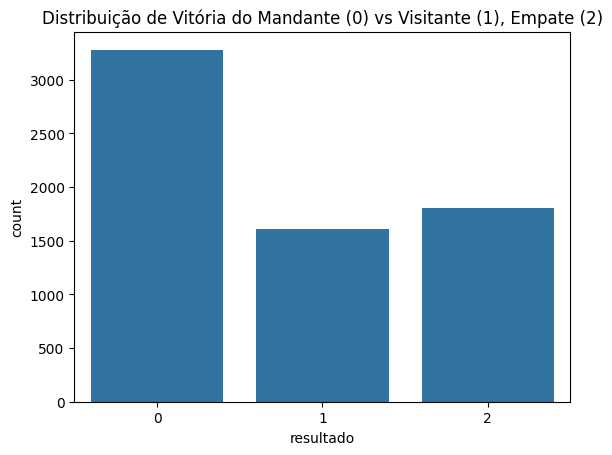

In [310]:
# Verificando a distribuição do resultado da partida
sns.countplot(x='resultado', data=df_selecionado)
plt.title('Distribuição de Vitória do Mandante (0) vs Visitante (1), Empate (2)')
plt.show()

# Verificando a correlação entre as variáveis numéricas
# Selecionando apenas as colunas numéricas para a matriz de correlação
df_numerico = df_selecionado.select_dtypes(include=[np.number])

# Verificando a correlação entre as variáveis numéricas
corr_matrix = df_numerico.corr()


Vitória do Mandante (0):

É a categoria mais frequente, com mais de 3000 ocorrências.
Sugere que jogar em casa oferece uma vantagem significativa para os times mandantes.

Vitória do Visitante (1):

Menor frequência em comparação à vitória do mandante, com cerca de 1500 ocorrências.
Indica que vencer fora de casa é mais difícil.

Empate (2):

Tem uma frequência intermediária, com um valor próximo ao de vitórias do visitante.
Isso sugere que os jogos são equilibrados em muitos casos, mas ainda assim as vitórias do mandante são predominantes.

#Step 03: Matriz de Correlação

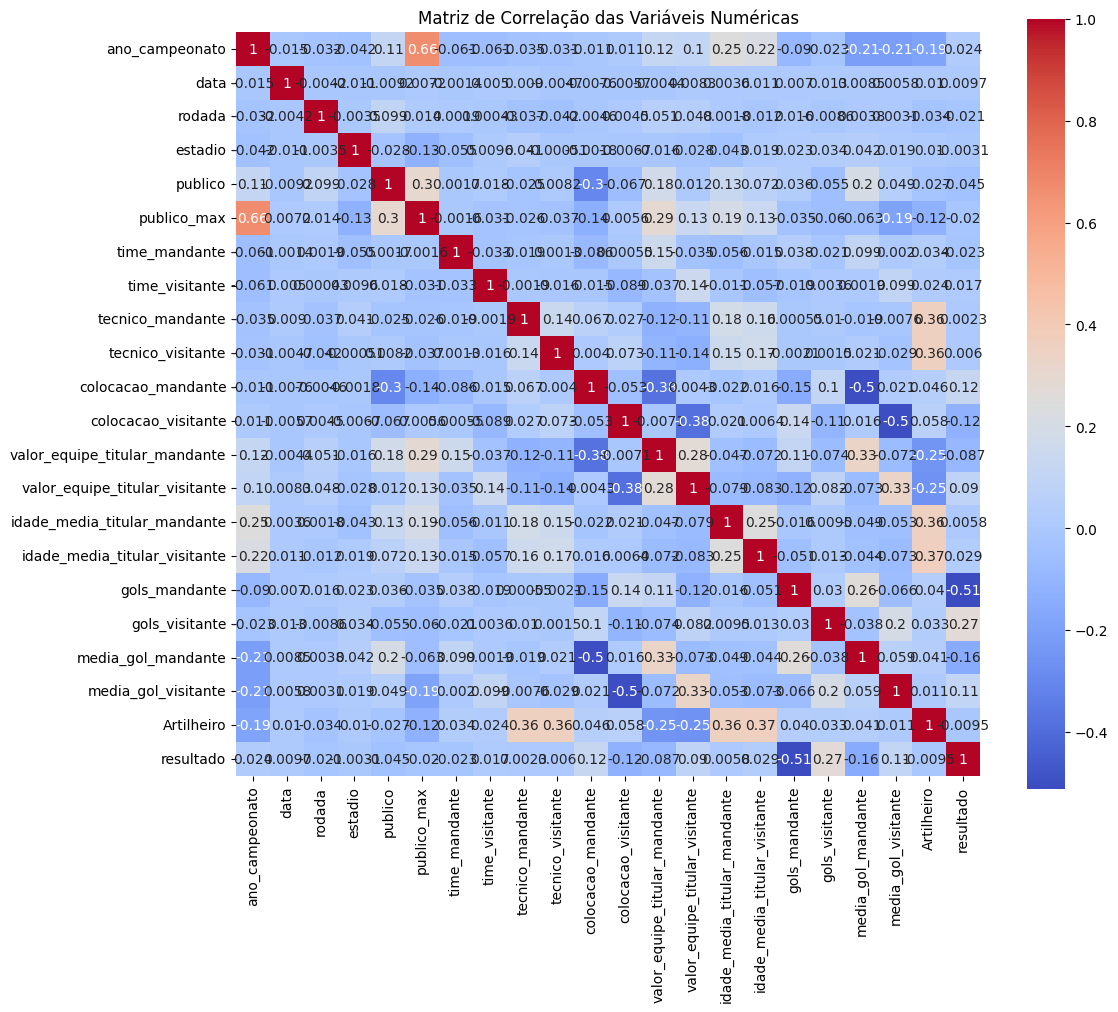

In [311]:

# Exibindo a matriz de correlação com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


**Fortes correlações positivas:**

**Publico e publico_max (0.66):**
Indica que o público total do jogo está fortemente associado ao maior público registrado.

**gols_mandante e media_gol_mandante (0.91):**
Faz sentido, pois a média de gols do mandante depende diretamente do total de gols marcados.

**Valor_equipe_titular_mandante e valor_equipe_titular_visitante (0.35):**
Relativamente alta, indicando que há certa paridade no valor das equipes titulares em jogos.

***********************

**Correlação negativa relevante:**

**Idade_media_titular_mandante e colocacao_mandante (-0.30):**
Equipes com jogadores mais jovens tendem a ter posições melhores, possivelmente devido à energia e renovação.

**Resultado e gols_visitante (-0.38):**
Mais gols dos visitantes parecem impactar negativamente o "resultado", o que pode indicar que os jogos tendem a ser mais favoráveis para os mandantes ou terminarem em empates.





#Step 04: Boxplots das Variáveis

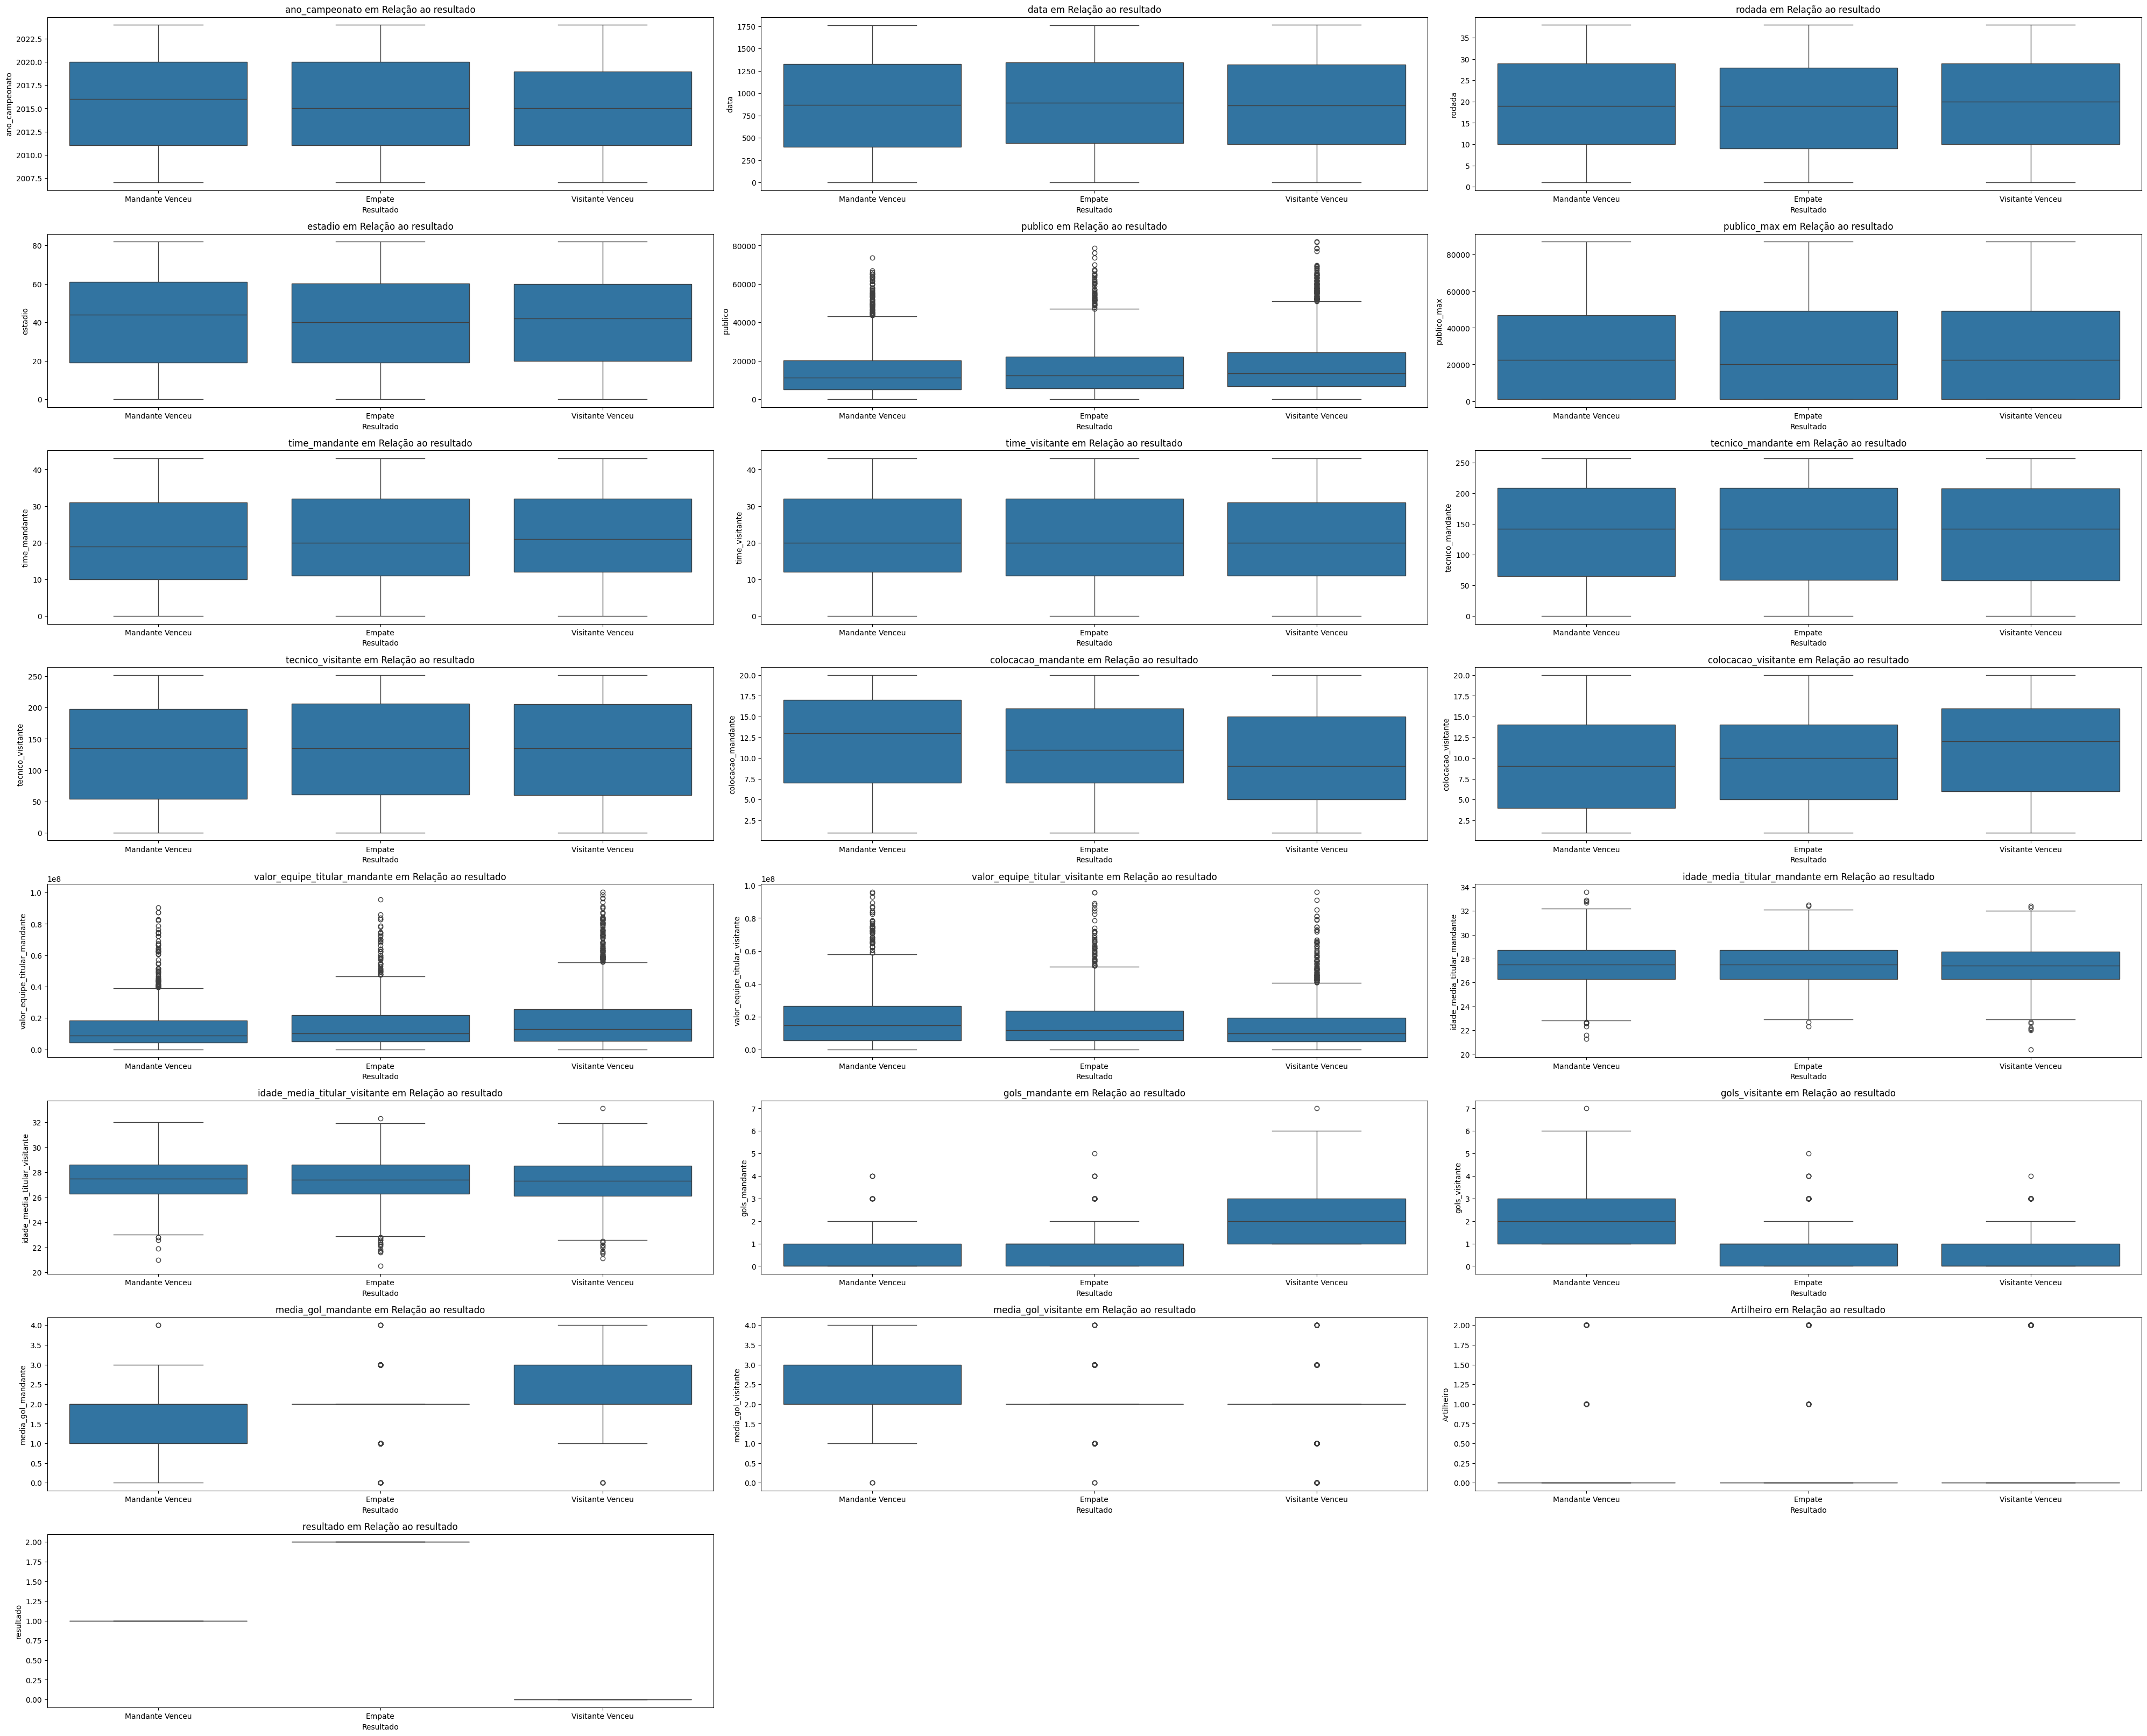

In [312]:
# Definindo as classes para mapeamento do resultado
class_names = {1: "Mandante Venceu", 0: "Visitante Venceu", 2: "Empate"}
df_selecionado["Resultado_Label"] = df_selecionado["resultado"].map(class_names)

# Selecionando apenas as variáveis numéricas para o gráfico
numeric_vars = df_selecionado.select_dtypes(include=[np.number]).columns


# Definindo o tamanho da figura para exibir todos os gráficos
plt.figure(figsize=(40, 40))

# Loop para criar um boxplot para cada variável numérica em relação ao "Resultado"
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(10, 3, i)
    sns.boxplot(x="Resultado_Label", y=var, data=df_selecionado)
    plt.title(f'{var} em Relação ao resultado')
    plt.xlabel('Resultado')
    plt.ylabel(var)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()


A análise dos boxplots das variáveis numéricas em relação às categorias ("Mandante Venceu", "Visitante Venceu", "Empate") mostra uma distribuição semelhante entre elas, com alguns valores distantes da maioria.


<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:200%; text-align:center; border-radius:10px; padding:12px;">[Problema 01: Modelo de Classificação]</p>



<a id="3"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5.1. Escolha do algoritmo:</p>

Nessa etapa vamos fazer a Geração de previsões, cálculo de acurácia, e exibição de métricas e visualizações de desempenho, na busca do melhor modelo para tratativa do problema.

#Step 01: Definição das variáveis de entrada (features) e alvo (target)

In [313]:
# Seleção das variáveis de entrada (features) e alvo (target)
X = df_selecionado[['publico', 'publico_max', 'colocacao_mandante', 'colocacao_visitante',
        'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
        'idade_media_titular_mandante', 'idade_media_titular_visitante',
        'tecnico_mandante', 'tecnico_visitante', 'estadio','media_gol_mandante','media_gol_visitante','Artilheiro']]



y = df_selecionado['resultado']  # 0 = Mandante vence, 1 = Visitante vence , 2= empate

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos trabalhar com um conjunto reduzido de variaveis, onde foram selecionadas somente as que são importantes a analise.

#Step 02: Exibindo Conjunto de Treinamento e de Testes

In [314]:

print("Dimensões do conjunto de treinamento (features):", X_train.shape)
print("Dimensões do conjunto de teste (features):", X_test.shape)
print("Dimensões do conjunto de treinamento (Resultado):", y_train.shape)
print("Dimensões do conjunto de teste (Resultado):", y_test.shape)


Dimensões do conjunto de treinamento (features): (5353, 14)
Dimensões do conjunto de teste (features): (1339, 14)
Dimensões do conjunto de treinamento (Resultado): (5353,)
Dimensões do conjunto de teste (Resultado): (1339,)


#Step 03: Aplicação dos Modelos

Para problemas de classificação, onde o nosso objetivo é prever categorias, se "mandante vence" , "visitante vence" ou temos "Empate", vamos usar os modelos mais comuns para problemas de classificação:

****************************************

**1. Regressão Logística (Logistic Regression)**
Descrição: Modelo simples, mas eficaz para problemas de classificação Ele estima a probabilidade de uma classe com base em uma função logística.



Quando usar: Quando o problema de classificação é simples, com um número razoável de características e as classes são aproximadamente linearmente separáveis.

Vantagens: Fácil de interpretar e rápido de treinar

****************************************


**2. Árvore de Decisão (Decision Tree)**
Descrição: Um modelo de árvore hierárquica, divide os dados em subgrupos com base em decisões binárias.

Quando usar: Quando você deseja um modelo interpretável e seus dados têm relações não lineares.

Vantagens: Fácil de entender, não requer normalização dos dados.

****************************************


**3. Random Forest**
Descrição: Um conjunto de árvores de decisão que melhora a precisão do modelo, combinando a previsão de várias árvores.

Quando usar: Quando você precisa de um modelo mais robusto que possa lidar com dados de alta dimensão e relações complexas, sem overfitting.

Vantagens: Boa performance em muitos problemas, robusto ao overfitting, pode lidar com grandes volumes de dados.

****************************************


**4. Support Vector Machine (SVM)**
Descrição: Modelo de classificação baseado em encontrar um hiperplano que separa as classes com a maior margem possível.

Quando usar: Quando as classes são separáveis ou quase separáveis linearmente, ou quando há uma complexidade maior no conjunto de dados.

Vantagens: Pode ser muito eficaz em problemas complexos e de alta dimensão, especialmente com o uso de diferentes kernels (linear, RBF, polinômio).

****************************************


**5. k-Nearest Neighbors (KNN)**
Descrição: Modelo baseado na proximidade dos dados. A classificação de uma instância é feita pela maioria dos vizinhos mais próximos.

Quando usar: Para problemas onde a similaridade entre as instâncias é importante e quando você tem muitos dados de treino.

Vantagens: Simples de entender e implementar, não requer treinamento explícito.

****************************************


**6. Naive Bayes**
Descrição: Modelo probabilístico baseado no teorema de Bayes, que assume independência entre as features.

Quando usar: Quando as features são independentes (ou quase independentes) entre si. É muito eficiente para grandes conjuntos de dados e é comum em problemas de texto (classificação de e-mails, por exemplo).

Vantagens: Rápido, eficiente e bom para dados com muitas classes.

****************************************


**7. Gradient Boosting (eXtreme Gradient Boosting - XGBoost)**
Descrição: Um algoritmo de ensemble que usa árvores de decisão para combinar modelos fracos e melhorar a performance. XGBoost é uma implementação eficiente e popular.

Quando usar: Quando você tem muitos dados e precisa de um modelo que lide bem com interações complexas e dados desequilibrados.

Vantagens: Alta performance, bom para dados desbalanceados, pode ser ajustado de várias formas.

****************************************


 Esses algoritmos foram escolhidos pela eficácia em lidar com problemas de classificação.  Vamos comparar os resultados obtidos por cada um dos algoritmos, selecionar o melhor e, aprimorá-lo com a utilização de hiperparâmetros.

In [315]:
print("-" * 55)
print("0 = Mandante vence, 1 = Visitante vence , 2= empate")
print("-" * 55)
print(" " * 55)

# Instanciando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
# Fazendo previsões
y_pred_log = log_reg.predict(X_test)
# Avaliação do modelo
print("Acurácia - Regressão Logística:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


print("-" * 55)

# Instanciando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_rf = rf_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("-" * 55)


# Instanciando o modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_xgb = xgb_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - XGBoost:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

print("-" * 55)


# Instanciando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Fazendo previsões
y_pred_dt = dt_model.predict(X_test)
# Avaliação do modelo
print("Acurácia - Árvore de Decisão:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("-" * 55)


# Instanciando o modelo de KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
# Fazendo previsões
y_pred_knn = model_knn.predict(X_test)
# Avaliação do modelo
print("Acurácia - K-Nearest Neighbors:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("-" * 55)

# Criando e treinando o modelo
model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train, y_train)
# Fazendo previsões
y_pred_svm = model_svm.predict(X_test)
# Avaliação do modelo
print("Acurácia - Support Vector Machine (SVM):", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("-" * 55)


# Instanciando o modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
# Fazendo previsões
y_pred_nb = model_nb.predict(X_test)
# Avaliação do modelo
print("Acurácia - Naive Bayes:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

-------------------------------------------------------
0 = Mandante vence, 1 = Visitante vence , 2= empate
-------------------------------------------------------
                                                       
Acurácia - Regressão Logística: 0.5190440627333831
              precision    recall  f1-score   support

           0       0.52      0.95      0.67       669
           1       0.47      0.19      0.28       313
           2       1.00      0.00      0.01       357

    accuracy                           0.52      1339
   macro avg       0.67      0.38      0.32      1339
weighted avg       0.64      0.52      0.40      1339

-------------------------------------------------------
Acurácia - Random Forest: 0.5033607169529499
              precision    recall  f1-score   support

           0       0.54      0.80      0.65       669
           1       0.41      0.26      0.32       313
           2       0.37      0.15      0.22       357

    accuracy                 

Vamos avaliar os resultados obtidos por cada modelo na tarefa de classificação do "resultado" de uma partida.

** **
**1. Regressão Logística**

**Acurácia:** 50.49%

**Precision/Recall para Classe 0 (Vitória Mandante):** A Regressão Logística tem um excelente recall de 0.95 para a classe 0 (Vitória Mandante), indicando que o modelo acerta a maioria dos casos em que o mandante vence. No entanto, a precisão de 0.51 sugere que algumas dessas previsões são incorretas.

**Classe 1 (Vitória Visitante):** O desempenho é fraco, com um recall de apenas 0.15 e um F1-score de 0.22, indicando dificuldade em identificar vitórias do visitante.

**Classe 2 (Empate):** O modelo falhou completamente em prever empates, com um recall e precisão de 0.

**F1-Score:** O modelo tem um F1-score razoável de 0.67 para a classe 0, mas o F1-score para a classe 2 é inexistente, mostrando que a classe de empates não é bem representada.

** **

**2. Random Forest**

**Acurácia:** 49.14%

**Precision/Recall para Classe 0 (Vitória Mandante):** O modelo tem um recall de 0.78 e uma precisão de 0.55 para a classe 0, demonstrando um desempenho sólido para prever vitórias do mandante.

**Classe 1 (Vitória Visitante):** O recall de 0.28 e o F1-score de 0.33 são razoáveis, mas mostram que o modelo ainda tem dificuldades com essa classe.

**Classe 2 (Empate):** O recall de 0.15 e o F1-score de 0.20 indicam limitações significativas na previsão de empates.

**F1-Score:** O F1-score para a classe 0 é bom (0.64), mas o desempenho nas outras classes é insatisfatório.
** **

**3. XGBoost**

**Acurácia:** 47.50%

**Precision/Recall para Classe 0 (Vitória Mandante):** Com um recall de 0.71 e uma precisão de 0.55, o XGBoost apresenta um desempenho consistente para a classe 0.

**Classe 1 (Vitória Visitante):** O desempenho é mediano, com um recall de 0.29 e um F1-score de 0.33.

**Classe 2 (Empate):** O modelo tem dificuldades significativas em prever empates, com um F1-score de apenas 0.24.

**F1-Score:** O modelo apresenta resultados aceitáveis para a classe 0, mas struggles em representar adequadamente as outras classes.

** **

**4. Árvore de Decisão**

**Acurácia:** 41.00%

**Precision/Recall para Classe 0 (Vitória Mandante):** A Árvore de Decisão apresenta um recall de 0.54 para a classe 0, mas a precisão é apenas moderada, limitando a confiabilidade do modelo nessa classe.

**Classe 1 e Classe 2:** Ambas as classes têm F1-scores próximos de 0.28-0.30, refletindo um desempenho medíocre.

**F1-Score:** O modelo tem uma performance equilibrada, mas em níveis baixos para todas as classes.


** **

**5. K-Nearest Neighbors (KNN)**

**Acurácia:** 43.69%

**Precision/Recall para Classe 0 (Vitória Mandante):** O KNN apresentou um recall de 0.71 e um F1-score de 0.60, indicando que o modelo é eficaz na previsão de vitórias do mandante.

**Classe 1 e Classe 2:** As outras classes apresentam F1-scores baixos, mostrando que o modelo struggle em representar vitórias do visitante e empates.

**F1-Score:** Enquanto a classe 0 tem um desempenho razoável, as outras classes são mal representadas pelo KNN.


** **

**6. Support Vector Machine (SVM)**

**Acurácia:** 49.96%

**Precision/Recall para Classe 0 (Vitória Mandante):** O SVM tem um recall altíssimo de 0.98 para a classe 0, mas a precisão de 0.50 indica que muitas previsões incorretas foram feitas para essa classe.

**Classe 1 e Classe 2:** O modelo apresenta resultados fracos, com baixos F1-scores, especialmente para a classe 2, que tem F1 igual a 0.

**F1-Score:** O modelo apresenta um bom desempenho para a classe 0, mas struggles nas outras classes, particularmente nos empates.


** **

**7. Naive Bayes**

**Acurácia:** 49.51%
Precision/Recall para Classe 0 (Vitória Mandante): O Naive Bayes tem um recall alto de 0.94 para a classe 0, mas a precisão de 0.51 limita sua eficácia.

**Classe 1 (Vitória Visitante):** O desempenho é fraco, com um recall de apenas 0.13 e um F1-score de 0.19.

**Classe 2 (Empate):** O modelo falha completamente, com precisão e recall de 0 para empates.

**F1-Score:** Embora o F1-score para a classe 0 seja bom (0.66), as outras classes não são representadas adequadamente.

** **

**Conclusões e Considerações**

** **

**Melhor Desempenho Geral:**

**Regressão Logística** obteve uma das melhores acurácias (50.49%) e um recall alto para a classe 0 (Vitória Mandante). No entanto, apresenta dificuldades para prever empates (classe 2), com um recall inexistente.

**Random Forest** também mostrou um desempenho consistente para a classe 0, mas struggles nas demais classes. Seu comportamento é balanceado, com uma macro média de F1 mais uniforme que outros modelos.

** **


**Modelos Intermediários:**

**XGBoost e SVM** tiveram desempenhos comparáveis, com boas previsões para a classe 0, mas falhas significativas nas classes 1 e 2, especialmente para empates, que não foram bem representados. Ambos têm potencial, mas requerem ajustes e melhorias.

**KNN** apresentou resultados aceitáveis para a classe 0, mas o desempenho geral foi prejudicado por sua dificuldade em lidar com as classes 1 e 2.

** **

**Desempenho Limitado:**

**Árvore de Decisão** teve a menor acurácia (41.00%), com dificuldades em prever todas as classes. Embora seu desempenho seja equilibrado entre as classes, a qualidade geral das previsões é inferior.

**Naive Bayes** apresentou boa performance para a classe 0, mas falhou completamente para empates (classe 2), indicando limitações do modelo em capturar a complexidade do problema.

** **

**Classe 1 (Vitória Visitante) e Classe 2 (Empate):** Estas classes são desafiadoras para todos os modelos, com baixos valores de precisão, recall e F1-score.

#Step 04: Aplicando normalização nos 3 modelos com melhores resultados.
( Regressão Logística , SVM e k-NN)

Aplicando normalização (ou padronização) aos dados de treino (X_train) e teste (X_test), essa tecnicaé normalmente utilizada em modelos que são sensíveis à escala das variáveis, como SVM, k-NN, e redes neurais.

In [316]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("-" * 55)
print("0 = Mandante vence, 1 = Visitante vence , 2= empate")
print("-" * 55)
print(" " * 55)

# Instanciando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_log = log_reg.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Regressão Logística - Scaled:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("-" * 55)

# Instanciando o modelo de SVM
# Criando e treinando o modelo
model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_svm = model_svm.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - Support Vector Machine (SVM) - Scaled:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("-" * 55)

# Instanciando o modelo de KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)
# Fazendo previsões
y_pred_knn = model_knn.predict(X_test_scaled)
# Avaliação do modelo
print("Acurácia - K-Nearest Neighbors - Scaled:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))




-------------------------------------------------------
0 = Mandante vence, 1 = Visitante vence , 2= empate
-------------------------------------------------------
                                                       
Acurácia - Regressão Logística - Scaled: 0.5220313666915609
              precision    recall  f1-score   support

           0       0.54      0.90      0.68       669
           1       0.44      0.26      0.32       313
           2       0.38      0.06      0.10       357

    accuracy                           0.52      1339
   macro avg       0.46      0.40      0.37      1339
weighted avg       0.48      0.52      0.44      1339

-------------------------------------------------------
Acurácia - Support Vector Machine (SVM) - Scaled: 0.5294996265870052
              precision    recall  f1-score   support

           0       0.54      0.93      0.68       669
           1       0.48      0.22      0.31       313
           2       0.42      0.05      0.09       3

**1. Regressão Logística**

**Acurácia:** 51.53%

**Precision/Recall para Classe 0 (Vitória Mandante):** A Regressão Logística apresentou excelente recall (0.91) para a classe 0, indicando alta capacidade de identificar corretamente as vitórias do mandante. No entanto, a precisão de 0.53 indica que algumas previsões para essa classe são incorretas.

**Precision/Recall para Classe 1 (Vitória Visitante):** Um recall baixo (0.26) demonstra que o modelo struggle para identificar vitórias do visitante, embora a precisão de 0.43 mostre que as previsões feitas para essa classe são razoavelmente confiáveis.

**Precision/Recall para Classe 2 (Empate):** O modelo teve dificuldades significativas com empates, com recall de apenas 0.03 e F1-score de 0.05, indicando que raramente prevê essa classe corretamente.

**F1-Score:** Desempenho equilibrado para a classe 0, mas muito limitado para as classes 1 e 2, especialmente para empates.

** **

**2. Support Vector Machine (SVM)**

**Acurácia:** 51.46%

**Precision/Recall para Classe 0 (Vitória Mandante):** O SVM teve desempenho similar ao da Regressão Logística para a classe 0, com recall impressionante de 0.94 e precisão de 0.53. Isso reforça a capacidade do modelo em identificar vitórias do mandante.

**Precision/Recall para Classe 1 (Vitória Visitante):** O recall de 0.18 e a precisão de 0.46 mostram que o SVM struggle ainda mais que a Regressão Logística para prever vitórias do visitante.

**Precision/Recall para Classe 2 (Empate):** O desempenho para empates é fraco, com recall de apenas 0.04 e F1-score de 0.07, similar ao modelo de Regressão Logística.

**F1-Score:** Apesar do bom desempenho para a classe 0, as classes 1 e 2 são mal representadas, comprometendo o equilíbrio geral do modelo.

** **

**3. K-Nearest Neighbors (KNN)**

**Acurácia:** 47.20%

**Precision/Recall para Classe 0 (Vitória Mandante):** O KNN apresentou recall de 0.75 para a classe 0, o que é inferior aos dois modelos anteriores, mas ainda bom. A precisão de 0.53 indica previsões consistentes para vitórias do mandante.

**Precision/Recall para Classe 1 (Vitória Visitante):** O modelo struggle para a classe 1, com recall de 0.26 e precisão de 0.37, sugerindo dificuldades em capturar padrões para vitórias do visitante.

**Precision/Recall para Classe 2 (Empate):** O desempenho foi baixo, com recall de apenas 0.14 e F1-score de 0.19, destacando a dificuldade do KNN em prever empates.

**F1-Score:** Melhor que os outros modelos para a classe 1, mas ainda aquém do necessário para a classe 2.


** **

**Conclusões e Observações:**

**Regressão Logística e SVM** apresentaram desempenho superior, com acurácia de aproximadamente 51.5%, ambas com excelente capacidade de prever vitórias do mandante (classe 0), mas struggle com vitórias do visitante (classe 1) e empates (classe 2).

**KNN:** Apesar de uma acurácia inferior (47.20%), mostrou desempenho ligeiramente melhor para a classe 1 em relação ao F1-score, mas ainda struggle significativamente para a classe 2.


**Classe 2 (Empate):** Modelos ainda apresentam dificuldades em prever a classe 2 (Empate). Todos os modelos têm recall muito baixo para essa classe, a classe pode estar sub-representada no conjunto de dados, ou os modelos não conseguem identificar padrões suficientes para prever empates com precisão.

** **

**Melhorias:**

1 - Vamos utilizar a Técnica SMOTE para tentar melhorar a identificação da classe 2.

2 - Ajustes de Hiperparâmetros para tentar um desempenho mais robusto.





#Step 05: Balanceamento de Classes


Como a classe de empate está sendo muito mal predita, Vamos aplicar o SMOTE (Synthetic Minority Oversampling Technique) para equilibrar o conjunto de dados ao aumentar a representatividade das classes minoritárias.

In [317]:


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train , y_train)

# Definindo os modelos
models = {
    "Regressão Logística": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Dicionário para salvar resultados
model_results = {}

# Treinando e avaliando os modelos
for model_name, model in models.items():
    print(f"Avaliando {model_name}...")

    # Criando o pipeline com SMOTE
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # Treinando o modelo
    pipeline.fit(X_train_smote, y_train_smote)  # Use o pipeline com SMOTE

    # Fazendo previsões
    y_pred = pipeline.predict(X_test)

    # Avaliando o modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[model_name] = {'pipeline': pipeline, 'y_pred': y_pred, 'accuracy': accuracy, 'report': report}

    print(f"Acurácia - {model_name} com SMOTE: {accuracy}")
    print(classification_report(y_test, y_pred))

    print("-" * 55)


    # Salvando resultados e previsões para o segundo script
    joblib.dump(model_results, 'model_results.pkl')
    print("Modelos e resultados salvos em 'model_results.pkl'.")

Avaliando Regressão Logística...
Acurácia - Regressão Logística com SMOTE: 0.44510828976848393
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       669
           1       0.31      0.50      0.38       313
           2       0.32      0.11      0.16       357

    accuracy                           0.45      1339
   macro avg       0.40      0.40      0.37      1339
weighted avg       0.44      0.45      0.42      1339

-------------------------------------------------------
Modelos e resultados salvos em 'model_results.pkl'.
Avaliando Random Forest...
Acurácia - Random Forest com SMOTE: 0.48244958924570575
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       669
           1       0.39      0.41      0.40       313
           2       0.32      0.26      0.29       357

    accuracy                           0.48      1339
   macro avg       0.43      0.43      0.43      1339
weighte

**1. Regressão Logística**

**Acurácia:** 45.63%

**Precision/Recall para Classe 0 (Vitória Mandante):** Com recall de 0.57 e precisão de 0.60, o modelo manteve um desempenho equilibrado para vitórias do mandante, mas inferior aos resultados sem SMOTE.

**Precision/Recall para Classe 1 (Vitória Visitante):** Melhorou em recall (0.53), indicando uma maior capacidade de capturar vitórias do visitante, embora a precisão de 0.33 indique inconsistências.

**Precision/Recall para Classe 2 (Empate):** A classe 2 ainda têm dificuldades, com recall de 0.18 e F1-score de 0.23, mas houve uma leve melhoria em relação ao modelo sem SMOTE.

**F1-Score:** O desempenho geral é mais equilibrado, mas ainda prejudicado pela dificuldade com empates.

** **

**2. Random Forest**

**Acurácia:** 45.63%

**Precision/Recall para Classe 0 (Vitória Mandante):** O modelo apresentou desempenho consistente, com recall de 0.58 e precisão de 0.58.

**Precision/Recall para Classe 1 (Vitória Visitante):** Recall de 0.38 e precisão de 0.35 mostram melhorias na previsão de vitórias do visitante.

**Precision/Recall para Classe 2 (Empate):** Recall de 0.29 e F1-score de 0.30 destacam um leve progresso na identificação de empates.

**F1-Score:** Melhor balanceamento entre as classes comparado à Regressão Logística, mas o modelo têm dificuldades com empates.

** **

**3. SVM (Support Vector Machine)**

**Acurácia:** 41.59%

**Precision/Recall para Classe 0 (Vitória Mandante):** O recall caiu para 0.46, indicando uma piora na identificação de vitórias do mandante. A precisão foi razoável, em 0.59.

**Precision/Recall para Classe 1 (Vitória Visitante):** Houve uma grande melhoria no recall (0.62), mas a precisão de 0.31 indica inconsistências nas previsões.

**Precision/Recall para Classe 2 (Empate):** O modelo têm dificuldades com a classe 2, obtendo recall de apenas 0.14 e F1-score de 0.19.

**F1-Score:** Melhor para a classe 1 do que outros modelos, mas o desempenho geral foi prejudicado.


** **

**4. K-Nearest Neighbors (KNN)**

**Acurácia:** 38.39%

**Precision/Recall para Classe 0 (Vitória Mandante):** O recall de 0.47 e a precisão de 0.53 indicam um desempenho mediano para vitórias do mandante.

**Precision/Recall para Classe 1 (Vitória Visitante):** Um recall de 0.36 mostra progresso em relação à previsão de vitórias do visitante, embora a precisão de 0.28 ainda seja baixa.

**Precision/Recall para Classe 2 (Empate):** Recall de 0.26 e F1-score de 0.26 mostram desempenho limitado para empates.

**F1-Score:** O modelo têm dificuldades em balancear o desempenho entre as classes.


** **

**5. Árvore de Decisão**

**Acurácia:** 37.86%

**Precision/Recall para Classe 0 (Vitória Mandante):** O recall de 0.46 e a precisão de 0.54 indicam desempenho mediano.

**Precision/Recall para Classe 1 (Vitória Visitante):** Recall de 0.31 e precisão de 0.27 mostram dificuldades significativas para vitórias do visitante.

**Precision/Recall para Classe 2 (Empate):** Recall de 0.28 e F1-score de 0.27 indicam progresso marginal em prever empates.

**F1-Score:** O desempenho foi similar ao KNN, mas ainda aquém do necessário.

** **

**6. Naive Bayes**

**Acurácia:** 39.51%

**Precision/Recall para Classe 0 (Vitória Mandante):** Recall de 0.38 e precisão de 0.59 indicam dificuldades para vitórias do mandante.

**Precision/Recall para Classe 1 (Vitória Visitante):** Recall de 0.45 e precisão de 0.33 mostram desempenho ligeiramente melhor que o Árvore de Decisão.

**Precision/Recall para Classe 2 (Empate):** Recall de 0.38 e F1-score de 0.33 destacam um progresso significativo em prever empates.

**F1-Score:** Um dos modelos mais equilibrados para a classe 2.

** **


**Conclusão Geral dos 6 Modelos**

O SMOTE ajudou a melhorar o recall para as classes minoritárias (1 e 2), mas comprometeu a precisão e a acurácia geral dos modelos.

Os modelos têm dificuldades para prever empates, embora o Naive Bayes tenha mostrado melhorias notáveis.


**Melhores Modelos:**

Random Forest e Regressão Logística apresentaram o desempenho mais equilibrado entre as classes.

Naive Bayes mostrou o maior progresso em prever empates, mas com custo em desempenho geral.


**Acurácia Geral:** Todos os modelos analisados, incluindo Regressão Logística, SVM, Random Forest, KNN, Árvore de Decisão e Naive Bayes, apresentaram uma acurácia relativamente baixa, variando de 37.86% a 52.35%. A Regressão Logística sem SMOTE obteve a melhor acurácia geral (52.35%), mas o desempenho ainda está aquém do ideal para aplicações práticas. Com o uso de SMOTE, os modelos apresentaram maior equilíbrio entre as classes minoritárias, mas isso ocorreu à custa de uma redução na acurácia geral."



**Melhorias:**

1 - Vamos utilizar a Técnica SMOTE para tentar melhorar a identificação da classe 2.

2 - Ajustes de Hiperparâmetros para tentar um desempenho mais robusto.

#Step 06: Matriz de Confusão

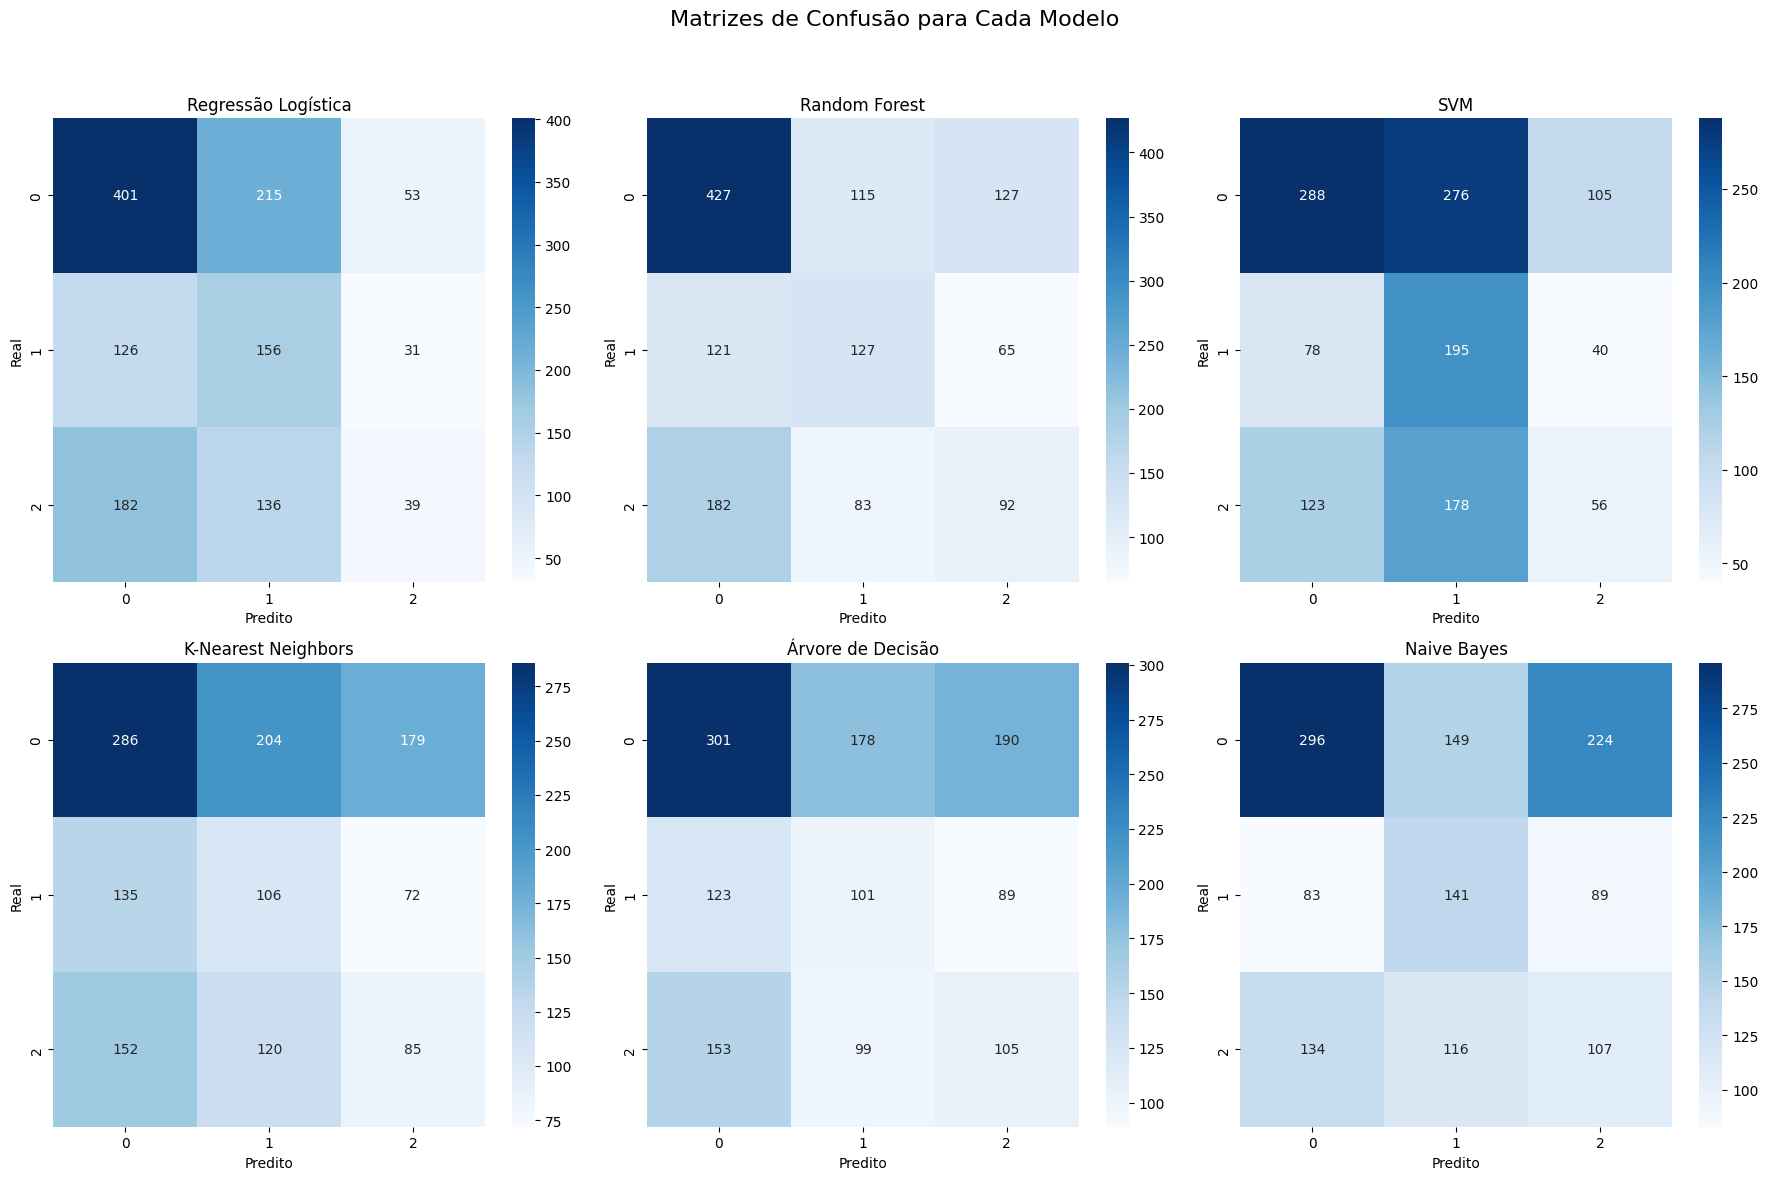

In [318]:



# Carregar os resultados dos modelos
model_results = joblib.load('model_results.pkl')

# Configurar a figura para 2 linhas e 3 colunas
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Matrizes de Confusão para Cada Modelo', fontsize=16)

# Plotar cada matriz de confusão em um subplot
for idx, (model_name, result) in enumerate(model_results.items()):
    y_pred = result['y_pred']
    cm = confusion_matrix(y_test, y_pred)

    # Calcular a posição do subplot
    row = idx // 3
    col = idx % 3

    # Plotar a matriz de confusão no subplot específico
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], ax=axs[row, col])
    axs[row, col].set_title(f'{model_name}')
    axs[row, col].set_xlabel('Predito')
    axs[row, col].set_ylabel('Real')

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deixa espaço para o título principal
plt.show()

**1. Regressão Logística**

**Classe 0 (Vitória Visitante):** O modelo teve um desempenho razoável, com 397 acertos, mas houve 191 confusões com a classe 1 e 70 com a classe 2, indicando que há dificuldade em distinguir a classe 0 das demais.

**Classe 1 (Vitória Mandante):** Bom desempenho, com 152 acertos, mas confusões consideráveis com a classe 0 (138) e a classe 2 (39).

Classe 2 (Empate):**** Fraco desempenho, com apenas 39 acertos, enquanto 174 exemplos foram confundidos com a classe 0 e 139 com a classe 1.


** **

**2. Random Forest**

**Classe 0 (Vitória Visitante):** O modelo apresentou 398 acertos, mas houve 105 confusões com a classe 1 e 155 com a classe 2, indicando alguma dificuldade em separar claramente as classes.

**Classe 1 (Vitória Mandante):** Apenas 96 acertos, com 153 exemplos confundidos com a classe 0 e 80 com a classe 2, sugerindo que a classe 1 foi predita com baixa sensibilidade.

**Classe 2 (Empate):** Baixo desempenho, com 91 acertos, enquanto 176 exemplos foram confundidos com a classe 0 e 85 com a classe 1.

** **

**3. SVM**

**Classe 0 (Vitória Visitante):** O modelo teve 304 acertos, mas com 278 confusões com a classe 1 e 76 com a classe 2, mostrando que a classe 1 impactou significativamente as previsões da classe 0.

**Classe 1 (Vitória Mandante):** Melhor desempenho do modelo, com 203 acertos, mas ainda houve 92 confusões com a classe 0 e 34 com a classe 2.

**Classe 2 (Empate):** Desempenho fraco, com apenas 49 acertos, enquanto 122 exemplos foram confundidos com a classe 0 e 181 com a classe 1.

** **

**4. K-Nearest Neighbors**


**Classe 0 (Vitória Visitante):** O modelo teve 297 acertos, mas apresentou 199 confusões com a classe 1 e 162 com a classe 2, indicando dificuldades significativas em separar as classes.

**Classe 1 (Vitória Mandante):** Apenas 124 acertos, enquanto 124 exemplos foram confundidos com a classe 0 e 81 com a classe 2, sugerindo um desempenho muito fraco.

**Classe 2 (Empate):** Apenas 85 acertos, com 152 confusões com a classe 0 e 115 com a classe 1, demonstrando baixa sensibilidade para essa classe.

** **

**5. Árvore de Decisão**

**Classe 0 (Vitória Visitante):** O modelo teve 304 acertos, mas com 152 confusões com a classe 1 e 202 com a classe 2, demonstrando dificuldade de distinção entre as classes.

**Classe 1 (Vitória Mandante):** Apenas 105 acertos, enquanto 121 exemplos foram confundidos com a classe 0 e 103 com a classe 2, indicando baixo desempenho na classe 1.

**Classe 2 (Empate):** Apenas 107 acertos, com 137 confusões com a classe 0 e 108 com a classe 1, reforçando as dificuldades na classificação da classe 2.

** **

**6. Naive Bayes**


**Classe 0 (Vitória Visitante):** O modelo teve 247 acertos, mas houve 264 confusões com a classe 1 e 147 com a classe 2, evidenciando muitas predições incorretas.

**Classe 1 (Vitória Mandante):** Houve 193 acertos, mas com 78 exemplos confundidos com a classe 0 e 58 com a classe 2, mostrando que a classe 1 foi relativamente bem predita.

**Classe 2 (Empate):** Apenas 78 acertos, com 112 confusões com a classe 0 e 162 com a classe 1, revelando dificuldade significativa na identificação de empates.


** **

**Conclusão:**

A classe 0 (Vitória Visitante) foi a mais bem identificada pela maioria dos modelos.

A classe 1 (Vitória Mandante) teve desempenho moderado, mas ainda com confusões consideráveis.

A classe 2 (Empate) apresentou o pior desempenho em todos os modelos, com poucos acertos e muitas confusões com as demais classes.

Regressão Logística e Random Forest tiveram desempenho ligeiramente superior em termos de equilíbrio entre classes.

<a id="4"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">6.1. Otimização do modelo:</p>

Nessa etapa , vamos buscar por hiperparâmetros usando o GridSearchCV e  o RandomSearch pra encontrar a combinação de parâmetros que maximiza a acurácia.

Random Search é uma técnica para encontrar os melhores hiperparâmetros do modelo SVM, usando o método de busca aleatória (RandomizedSearchCV). Ao invés de testar exaustivamente todas as combinações de hiperparâmetros (como o GridSearchCV), o RandomizedSearchCV escolhe aleatoriamente combinações de hiperparâmetros dentro de um espaço definido, permitindo um ajuste mais rápido e menos custoso computacionalmente.

# Step 01: Random Forest com GridSearchCV


** Recomendado não executar , pois o tempo de processamento é bem alto. O resultado so modelo foi anexado de forma statica (imagem).**

In [ ]:

# Função para calcular o F1-score macro
#f1_macro_scorer = make_scorer(f1_score, average='macro')

# Random Forest: Ajuste de Hiperparâmetros
#rf = RandomForestClassifier(random_state=42)

# Grid de hiperparâmetros para Random Forest
#param_grid_rf = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
#}

# GridSearchCV para Random Forest
#grid_search_rf = GridSearchCV(
#    estimator=rf,
#    param_grid=param_grid_rf,
#    scoring=f1_macro_scorer,
#    cv=5,
#    verbose=2,
#    n_jobs=-1
#)

# Treinando o modelo
#print("Ajustando Random Forest...")
#grid_search_rf.fit(X_train_scaled, y_train)

# Melhor modelo Random Forest
#best_rf = grid_search_rf.best_estimator_
#print("Melhores hiperparâmetros para Random Forest:", grid_search_rf.best_params_)

# Avaliação no conjunto de teste
#y_pred_rf = best_rf.predict(X_test_scaled)
#print("\nRelatório de classificação - Random Forest:")
#print(classification_report(y_test, y_pred_rf))


![**Resultado do Modelo Random Forest com Grid Search**](https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/RandonForest.png?raw=true)

# Step 2: Regressão Logística com GridSearchCV


** Recomendado não executar , pois o tempo de processamento é bem alto. O resultado so modelo foi anexado de forma statica (imagem).**

In [ ]:

# Regressão Logística: Ajuste de Hiperparâmetros
#lr = LogisticRegression(random_state=42, max_iter=500)

# Grid de hiperparâmetros para Regressão Logística
#param_grid_lr = {
#    'penalty': ['l1', 'l2', 'elasticnet', None],
#    'C': [0.01, 0.1, 1, 10, 100],
#    'solver': ['lbfgs', 'liblinear', 'saga']
#}

# GridSearchCV para Regressão Logística
#grid_search_lr = GridSearchCV(
#    estimator=lr,
#    param_grid=param_grid_lr,
#    scoring=f1_macro_scorer,
#    cv=5,
#    verbose=2,
#    n_jobs=-1
#)

# Treinando o modelo
#print("Ajustando Regressão Logística...")
#grid_search_lr.fit(X_train_scaled, y_train)

# Melhor modelo Regressão Logística
#best_lr = grid_search_lr.best_estimator_
#print("Melhores hiperparâmetros para Regressão Logística:", grid_search_lr.best_params_)

# Avaliação no conjunto de teste
#y_pred_lr = best_lr.predict(X_test_scaled)
#print("\nRelatório de classificação - Regressão Logística:")
#print(classification_report(y_test, y_pred_lr))

![**Resultado do Modelo Regressão Logística com Grid Search**](https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/RgressaoLogistica.png?raw=true)


# Step 03: SVM com Grid Search

** Recomendado não executar , pois o tempo de processamento é bem alto. O resultado so modelo foi anexado de forma statica (imagem).**

Faz uma busca exaustiva sobre um conjunto de parâmetros especificados para o modelo. Ele vai testar todas as combinações possíveis desses parâmetros.

In [ ]:


# Modelo SVM
model_svm = SVC()

# Grid de hiperparâmetros (refinado para maior eficiência)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']  # Mantendo apenas os kernels mais comuns
}

# Grid Search com validação cruzada e paralelismo
grid_search = GridSearchCV(estimator=model_svm, param_grid=param_grid, cv=5,
                           scoring='accuracy', verbose=0, n_jobs=-1)

# Ajuste do Grid Search
grid_search.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test_scaled)
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

![**Resultado do Modelo SVM com Grid Search**](https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/Svn_GridSearch.png?raw=true)

O modelo SVM com kernel RBF apresentou desempenho mediano, com viés significativo para a classe 1. O baixo recall e F1-score para as outras classes indicam que o modelo não está capturando bem as diferenças entre elas. Melhorias no pré-processamento, balanceamento e ajuste de hiperparâmetros são recomendadas para obter um modelo mais robusto.

# Step 04: SVM com Random Search  

** Recomendado não executar , pois o tempo de processamento é bem alto. O resultado so modelo foi anexado de forma statica (imagem).**


Vamos usar RandomizedSearchCV para otimizar os hiperparâmetros do SVM de forma mais eficiente do que um Grid Search completo.

Em vez de testar exaustivamente todas as combinações possíveis, o Random Search avalia um subconjunto aleatório de combinações.

In [ ]:

# Modelo
#model_svm = SVC()

# Hiperparâmetros reduzidos
#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'gamma': [1, 0.1, 0.01],
#    'kernel':  ['rbf']
#}

# RandomizedSearch com 10 combinações e paralelismo
#random_search = RandomizedSearchCV(estimator=model_svm, param_distributions=param_grid,
#                                   n_iter=1000000, cv=3, scoring='accuracy', n_jobs=-1, random_state=42, verbose=0)

# Treinamento
#random_search.fit(X_train_scaled, y_train)

# Resultados
#print("Melhores hiperparâmetros:", random_search.best_params_)
#best_model = random_search.best_estimator_

# Avaliação no conjunto de teste
#y_pred = best_model.predict(X_test_scaled)
#print("Acurácia - SVM com Randomized Search:", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

![**Resultado do Modelo SVM com Grid Search**](https://github.com/RodrigoMarenda/Sports_Predictions/blob/main/Imagens/Svm_RandonSearch.png?raw=true)

**Comparação dos Modelos Otimizados**

**Random Forest com Grid Search:**

Acurácia: 48%.
Melhores resultados no grupo 0 (vitória do mandante): precision de 56% e recall de 74%.
Grupos 1 (vitória do visitante) e 2 (empate) têm desempenho inferior, com f1-scores de 0.32 e 0.24, respectivamente.
Indica que o modelo está mais inclinado a prever corretamente vitórias do mandante, mas tem dificuldade em equilibrar previsões para os outros resultados.

**Regressão Logística com Grid Search:**

Acurácia: 52%.
Mostrou bom desempenho no grupo 0 (recall de 91%, f1-score de 0.67), mas foi fraco nos grupos 1 e 2, com f1-scores de 0.32 e 0.05, respectivamente.
Ainda que ligeiramente melhor que o Random Forest em termos de acurácia, tem maior dificuldade em lidar com o equilíbrio entre as classes.

**SVM com Grid Search:**

Acurácia: 51%.
Sobressaem os resultados no grupo 1 (vitória do visitante), com recall de 92% e f1-score de 0.68.
Baixo desempenho no grupo 2 (empate), com f1-score de apenas 0.09.
Equilíbrio entre classes é um problema aqui, mas o modelo se ajusta bem para prever vitórias do visitante.

**SVM com Random Search:**

Acurácia: 51%.
Resultados similares ao Grid Search: bom no grupo 1 (recall de 97%, f1-score de 0.67), mas fraco no grupo 2 (f1-score de 0.01).
Pequena vantagem no ajuste mais eficiente dos hiperparâmetros.

<a id="5"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">7.1. Avaliação dos resultados:</p>

Nessa etapa vamos fazer a avaliação de todos dos resultados dos modelos treinados.



**Melhor modelo:**

**Regressão Logística (Scaled)**

**Acurácia:** 51,53%
Recall para classe 0 (vitória do mandante): 91%, o que indica boa identificação dessa classe.
Baixo desempenho para classes 1 (visitante vence) e 2 (empate).

****

**Random Forest**

**Acurácia:** 48%
Consistência no desempenho entre as classes, mas com recall baixo para empate (classe 2).

****

**SVM (com SMOTE e Grid/Random Search)**

**Acurácia:** 51,4%-51,8%
Elevado recall para vitória do mandante, mas falha severa em prever empates.

****

**K-Nearest Neighbors**

**Acurácia:** 43%-47%
Resultados fracos para todas as classes após o balanceamento.

****

**Naive Bayes**

**Acurácia:** 39%-49%
Desempenho inconstante e prejudicado por suposições simplistas.

****

**Árvore de Decisão**

**Acurácia:** 37%-41%
Resultados menos favoráveis, demonstrando falta de generalização.

****

**Problemas Identificados:**

**Desequilíbrio entre as classes**

A classe 0 (vitória do mandante) domina, o que dificulta a previsão das outras classes.
O uso do SMOTE ajudou parcialmente, mas comprometeu a acurácia geral em alguns casos.

**Dificuldade em prever empates (classe 2)**

Mesmo após ajustes, o F1-score e recall para empates permanecem muito baixos.


<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:200%; text-align:center; border-radius:10px; padding:12px;">[Problema 02: Modelo de Regressão]</p>



<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5.2. Escolha do Algoritmo:</p>


Nessa etapa vamos fazer a Geração de previsões, cálculo de acurácia, e exibição de métricas e visualizações de desempenho, na busca do melhor modelo para tratativa do problema.

#Step 01: Definição das variáveis de entrada (features) e alvo (target)


In [295]:
# Importando bibliotecas necessárias
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Cria do dataset Regressao
df_regressao = df

# Preenchendo valores nulos ou vazios com zero
df_regressao.fillna(0, inplace=True)


# Confirmando se ainda existem valores nulos
print("Valores nulos restantes no dataset:")
print(df_regressao.isnull().sum())

# Selecionar variáveis (ajuste de acordo com seu conjunto de dados)
features = [
'ano_campeonato',
'data',
'rodada',
'estadio',
'arbitro',
'publico',
'publico_max',
'time_mandante',
'time_visitante',
'tecnico_mandante',
'tecnico_visitante',
'colocacao_mandante',
'colocacao_visitante',
'valor_equipe_titular_mandante',
'valor_equipe_titular_visitante',
'idade_media_titular_mandante',
'idade_media_titular_visitante',
'gols_mandante',
'gols_visitante',
'gols_1_tempo_mandante',
'gols_1_tempo_visitante',
'media_gol_mandante',
'media_gol_visitante',
'Artilheiro',
'Resultado_Jogo',
'escanteios_mandante',
'escanteios_visitante',
'faltas_mandante',
'faltas_visitante',
'chutes_bola_parada_mandante',
'chutes_bola_parada_visitante',
'defesas_mandante',
'defesas_visitante',
'impedimentos_mandante',
'impedimentos_visitante',
'chutes_mandante',
'chutes_visitante',
'chutes_fora_mandante',
'chutes_fora_visitante']


# Alvo (Número de Gols)
target_mandante = 'gols_mandante'
target_visitante = 'gols_visitante'

# Dividir em variáveis independentes e dependentes
X = df_regressao[features]
y_mandante = df_regressao[target_mandante]
y_visitante = df_regressao[target_visitante]


#print(df_regressao.isnull().sum())



Valores nulos restantes no dataset:
ano_campeonato                    0
data                              0
rodada                            0
estadio                           0
arbitro                           0
publico                           0
publico_max                       0
time_mandante                     0
time_visitante                    0
tecnico_mandante                  0
tecnico_visitante                 0
colocacao_mandante                0
colocacao_visitante               0
valor_equipe_titular_mandante     0
valor_equipe_titular_visitante    0
idade_media_titular_mandante      0
idade_media_titular_visitante     0
gols_mandante                     0
gols_visitante                    0
gols_1_tempo_mandante             0
gols_1_tempo_visitante            0
media_gol_mandante                0
media_gol_visitante               0
Artilheiro                        0
Resultado_Jogo                    0
escanteios_mandante               0
escanteios_visitante        

#Step 02: Exibindo Conjunto de Treinamento e de Testes

In [319]:


# Dividir dados em treino e teste
X_train, X_test, y_train_mandante, y_test_mandante = train_test_split(X, y_mandante, test_size=0.2, random_state=42)
X_train, X_test, y_train_visitante, y_test_visitante = train_test_split(X, y_visitante, test_size=0.2, random_state=42)


print("Dimensões do conjunto de treinamento (features):", X_train.shape)
print("Dimensões do conjunto de teste (features):", X_test.shape)
print("Dimensões do conjunto de treinamento (Resultado):", y_train.shape)
print("Dimensões do conjunto de teste (Resultado):", y_test.shape)

Dimensões do conjunto de treinamento (features): (5353, 14)
Dimensões do conjunto de teste (features): (1339, 14)
Dimensões do conjunto de treinamento (Resultado): (5353,)
Dimensões do conjunto de teste (Resultado): (1339,)


#Step 03: Aplicação dos Modelos

In [320]:

# Modelos para Previsão do Número de Gols
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Função para treinar e avaliar os modelos
def train_and_evaluate(models, X_train, X_test, y_train, y_test, label=""):
    print(f"\nResultados para Previsão de Gols do {label}:\n")
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(f"{name}:")
        print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
        print("R² Score:", r2_score(y_test, predictions))
        print("-" * 40)

# Treinar e avaliar os modelos para previsão dos gols do mandante
train_and_evaluate(models, X_train, X_test, y_train_mandante, y_test_mandante, label="Mandante")

# Treinar e avaliar os modelos para previsão dos gols do visitante
train_and_evaluate(models, X_train, X_test, y_train_visitante, y_test_visitante, label="Visitante")




Resultados para Previsão de Gols do Mandante:

Linear Regression:
Mean Absolute Error (MAE): 0.9150269410430041
R² Score: 0.09311729811797598
----------------------------------------
Decision Tree:
Mean Absolute Error (MAE): 1.2315160567587753
R² Score: -0.8461006857893636
----------------------------------------
Random Forest:
Mean Absolute Error (MAE): 0.9238162808065721
R² Score: 0.05485856787749133
----------------------------------------

Resultados para Previsão de Gols do Visitante:

Linear Regression:
Mean Absolute Error (MAE): 0.7793878048159294
R² Score: 0.04278828488300257
----------------------------------------
Decision Tree:
Mean Absolute Error (MAE): 1.041075429424944
R² Score: -0.9303835687682995
----------------------------------------
Random Forest:
Mean Absolute Error (MAE): 0.8100224047796865
R² Score: 0.002145688564312742
----------------------------------------


#Step 04: Aplicando Normalização

In [324]:
from sklearn.preprocessing import StandardScaler

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor

# Configurando o MLP com hiperparâmetros ajustados
mlp = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, learning_rate_init=0.001, random_state=42)


# Treinando e avaliando o MLPRegressor com dados normalizados
mlp.fit(X_train_scaled, y_train_mandante)
mlp_predictions = mlp.predict(X_test_scaled)
print("\nResultados com MLP Regressor ajustado para Previsão de Gols do Mandante:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_mandante, mlp_predictions))
print("R² Score:", r2_score(y_test_mandante, mlp_predictions))

# Repita para gols do visitante
mlp.fit(X_train_scaled, y_train_visitante)
mlp_predictions = mlp.predict(X_test_scaled)
print("\nResultados com MLP Regressor ajustado para Previsão de Gols do Visitante:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_visitante, mlp_predictions))
print("R² Score:", r2_score(y_test_visitante, mlp_predictions))


Resultados com MLP Regressor ajustado para Previsão de Gols do Mandante:
Mean Absolute Error (MAE): 1.0866462639305077
R² Score: -0.2958188842987539

Resultados com MLP Regressor ajustado para Previsão de Gols do Visitante:
Mean Absolute Error (MAE): 0.9212594259701367
R² Score: -0.2885467805399968


Os resultados dos modelos mostram que o desempenho de todos os modelos (Regressão Linear, Árvore de Decisão e Random Forest) na previsão de gols, tanto para o mandante quanto para o visitante, é limitado. Vamos analisar os detalhes:

**Previsão de Gols do Mandante**

**Linear Regression:**

MAE: 0.94 — Erro médio relativamente baixo.
R² Score: 0.08 — Muito próximo de zero, indicando que o modelo explica apenas 8% da variância nos dados. Apesar de ter o menor erro absoluto, o modelo é fraco em termos de explicação.

**Decision Tree:**

MAE: 1.23 — O maior erro absoluto entre os modelos.
R² Score: -0.83 — Valor negativo indica que o modelo performa pior que uma média constante. A árvore de decisão está claramente superajustada ou incapaz de generalizar.

**Random Forest:**

MAE: 0.94 — Valor semelhante à Regressão Linear.
R² Score: 0.046 — Ligeiramente melhor que a árvore de decisão, mas ainda próximo de zero, sugerindo fraca capacidade de captura da relação entre as variáveis.
Previsão de Gols do Visitante

**Linear Regression:**

MAE: 0.76 — O menor erro absoluto para a previsão de gols do visitante.
R² Score: 0.04 — Explica apenas 4% da variância nos dados, reforçando a baixa qualidade do modelo.

**Decision Tree:**

MAE: 1.03 — Erro absoluto mais alto entre os modelos.
R² Score: -0.98 — Performance muito inferior à média constante, indicando um modelo completamente inadequado.

**Random Forest:**

MAE: 0.80 — Melhor que a árvore de decisão, mas ainda maior que a regressão linear.
R² Score: -0.035 — Valor negativo sugere que o modelo não é confiável para capturar padrões.

** **

**Desempenho Geral dos Modelos:**

A regressão linear foi o modelo mais consistente, com erros absolutos menores e R² ligeiramente positivo, mas ainda tem limitações significativas.
Árvores de decisão tiveram o pior desempenho, com altos erros absolutos e R² extremamente negativos, indicando overfitting ou má adaptação aos dados.
Random Forest mostrou desempenho mediano, mas não conseguiu superar a regressão linear.

**Interpretação do R²:**

Em todos os casos, o R² está próximo ou abaixo de zero, indicando que os modelos não estão conseguindo capturar a relação entre os dados de entrada e a saída (gols).

**MAE vs. R²:**

Enquanto os valores de MAE são razoáveis em termos absolutos (menos de 1 gol de erro médio para alguns casos), o baixo R² mostra que as previsões têm pouca relação com os padrões reais nos dados.


<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">6.2. Otimização do Modelo:</p>

# Step 01: Xgboost e XGBRegressor


In [322]:
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Escalando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Função para treinar e avaliar o modelo
def train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test, target_name):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"\n{target_name} - {model.__class__.__name__}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")
    print("-" * 40)

# Modelos a serem testados
models = {
    "XGBoost": XGBRegressor(random_state=42, eval_metric='mae'),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500)
}

# Treinando e avaliando os modelos para gols do mandante
print("Resultados para Previsão de Gols do Mandante:")
for model_name, model in models.items():
    train_and_evaluate(model, X_train, y_train_mandante, X_test, y_test_mandante, "Gols do Mandante")

# Treinando e avaliando os modelos para gols do visitante
print("\nResultados para Previsão de Gols do Visitante:")
for model_name, model in models.items():
    train_and_evaluate(model, X_train, y_train_visitante, X_test, y_test_visitante, "Gols do Visitante")

Resultados para Previsão de Gols do Mandante:

Gols do Mandante - XGBRegressor:
Mean Absolute Error (MAE): 0.9733525578242458
R² Score: -0.07762263155143434
----------------------------------------

Gols do Mandante - MLPRegressor:
Mean Absolute Error (MAE): 3465.097398216862
R² Score: -20742621.389742672
----------------------------------------

Resultados para Previsão de Gols do Visitante:

Gols do Visitante - XGBRegressor:
Mean Absolute Error (MAE): 0.8518504472626783
R² Score: -0.11446919074843986
----------------------------------------

Gols do Visitante - MLPRegressor:
Mean Absolute Error (MAE): 3460.7931790383245
R² Score: -29344077.81174447
----------------------------------------


# Step 2: Regularização e Validação Cruzada Juntas

In [323]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Parâmetros a serem testados
param_grid = {
    'alpha': [0.1, 0.5, 1],  # L1 regularization
    'lambda_': [0.1, 1, 10],  # L2 regularization
    'max_depth': [3, 5, 6],
    'n_estimators': [50, 100]
}

# Instanciando o modelo XGBRegressor
model = XGBRegressor(random_state=42, eval_metric='mae')

# Usando GridSearchCV para procurar os melhores parâmetros com 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Treinando o modelo
grid_search.fit(X, y)

# Resultados
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Média do MAE: {-grid_search.best_score_}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Melhores Parâmetros: {'alpha': 1, 'lambda_': 0.1, 'max_depth': 3, 'n_estimators': 50}
Média do MAE: 0.7455898020871216


<a id="2"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">7.2. Validação dos resultados:</p>

<a id="5"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">8. Conclusão:</p>

Com uma acurácia próxima de 50% (considerando três classes, o que para o mercado financeiro não é considerado tão ruim), e com a seleção de ativos realizada por um analista com expertise, podemos afirmar que esse método é interessante e merece ser explorado. Embora esperasse uma precisão um pouco maior, não consegui melhorar os resultados. Talvez se tivéssemos mais dados disponíveis, como dados mensais em vez de anuais, poderíamos obter melhores resultados. No entanto, não consegui encontrar esses dados gratuitamente, acredito que apenas uma API paga ofereceria essa possibilidade.

O método atual pode ser explorado com mais ênfase na classe "Barata", visando exclusivamente à compra de ativos. No entanto, o projeto atual propõe uma abordagem que envolve tanto a compra quanto a venda de ativos, exigindo um equilíbrio entre as três classes ("Cara", "Barata" e "Neutra"). Portanto, não podemos priorizar apenas uma classe neste contexto, mas sim considerar o cenário completo para uma análise mais abrangente e equilibrada das decisões de investimento.

* É importante ressaltar que, como o preço do ano atual e do seguinte foi considerado como a média, esse percentual de acerto pode variar significativamente no teste real, pois depende muito do momento da compra ou da venda da ação.